In [1]:
import torch
import torch.nn as nn
import torchvision
import os
import matplotlib.pyplot as plt
import numpy as np
import h5py

In [2]:
result_path = "../results/"
dataset = "Cifar10"
algo = "FedMGDA"
model = "resnet"
client_number = 10
join_ratio = 1.
file_path = result_path + f"{dataset}_{algo}_nc={client_number}_jr={join_ratio}.h5"

In [3]:
avg_path = result_path + f"Cifar10_FedMGDA_nc={client_number}_jr=1.0_10000.h5"
mgda_path = result_path + f"Cifar10_FedMGDA_nc={client_number}_jr=1.0_20000.h5"
moco_path = result_path + f"Cifar10_FedMoCo_nc={client_number}_jr=1.0_30000.h5"
static_path = result_path + f"Cifar10_FedMGDA_nc={client_number}_jr=1.0_40000.h5"

In [4]:
favg = h5py.File(avg_path, "r")
fmoco = h5py.File(moco_path, "r")
fmgda = h5py.File(mgda_path, "r")
fstatic = h5py.File(static_path, "r")

In [5]:
client_num_data = np.array([1699, 937, 1682, 4680, 1506, 714, 1300, 5478, 1394, 1885, 1534, 4185, 1203, 835, 1161,
5799, 1986, 1081, 1563, 4368])
client_avg_weights = client_num_data /60000
client_labels = [[0,1],[0,1],[0,1],[0,1],[2,3],[2,3],[2,3],[2,3],[4,5],[4,5],[4,5],[4,5],[6,7],[6,7],[6,7],[6,7],[8,9],[8,9],[8,9],[8,9]]
print(client_avg_weights)

[0.02831667 0.01561667 0.02803333 0.078      0.0251     0.0119
 0.02166667 0.0913     0.02323333 0.03141667 0.02556667 0.06975
 0.02005    0.01391667 0.01935    0.09665    0.0331     0.01801667
 0.02605    0.0728    ]


In [6]:
print(fmoco.keys())

<KeysViewHDF5 ['rs_local_train_losses', 'rs_test_acc', 'rs_test_auc', 'rs_train_loss', 'rs_weights']>


In [7]:
print(fmoco['rs_test_acc'])

<HDF5 dataset "rs_test_acc": shape (1001,), type "<f8">


In [8]:
rounds = np.arange(len(favg['rs_weights']))
avg_weights = np.array(favg['rs_weights']).T
moco_weights = np.array(fmoco['rs_weights']).T
mgda_weights = np.array(fmgda['rs_weights']).T
static_weights = np.array(fstatic['rs_weights']).T

In [9]:
print(fmgda['rs_weights'][1])

[ 1.48792656e-16  2.95514700e-01  3.91285786e-16  0.00000000e+00
 -9.08434012e-17  4.63068340e-01  3.90235426e-17 -5.42713955e-19
  2.32793237e-01  8.62372264e-03]


In [10]:
client_num = 1

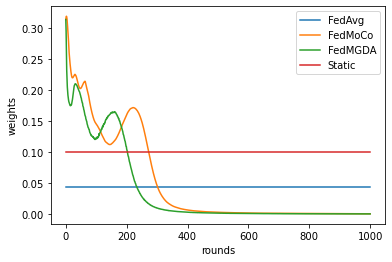

In [11]:
plt.plot(rounds, avg_weights[client_num], label='FedAvg')
plt.plot(rounds, moco_weights[client_num], label='FedMoCo')
plt.plot(rounds, mgda_weights[client_num], label='FedMGDA')
plt.plot(rounds, static_weights[client_num], label='Static')
plt.xlabel('rounds')
plt.ylabel('weights')
plt.legend()
plt.show()

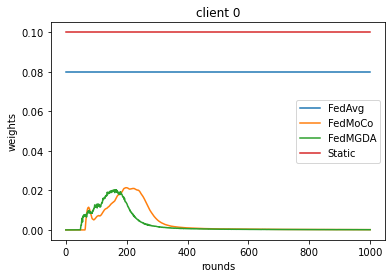

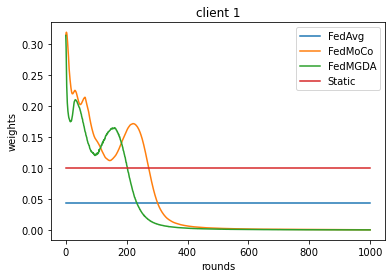

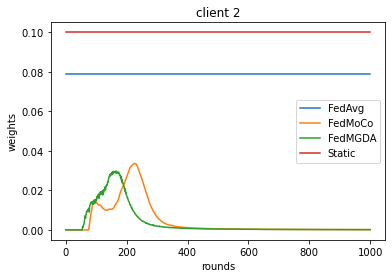

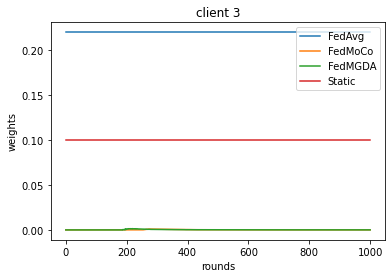

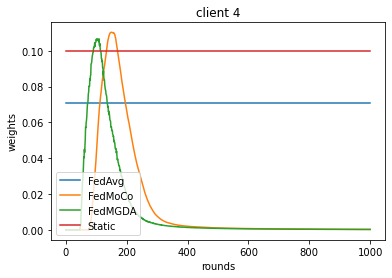

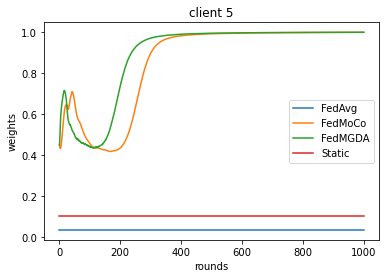

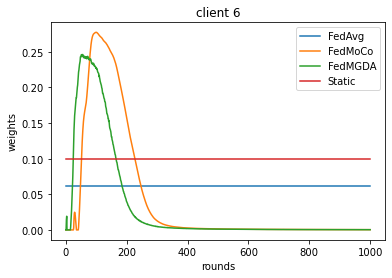

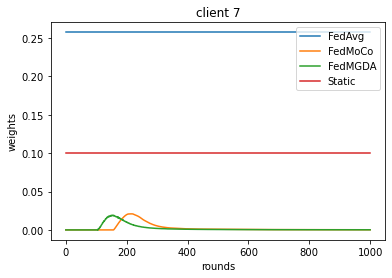

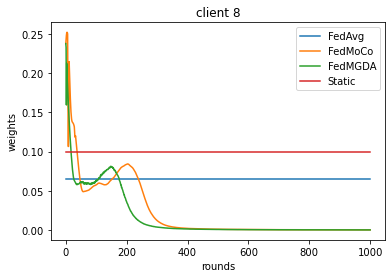

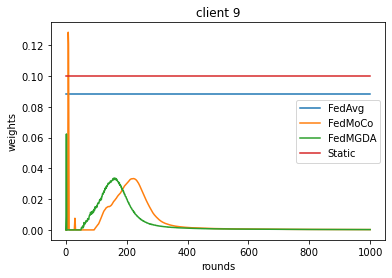

In [12]:
for client_num in range(client_number):
    plt.title(f'client {client_num}')
    plt.plot(rounds, avg_weights[client_num], label='FedAvg')
    plt.plot(rounds, moco_weights[client_num], label='FedMoCo')
    plt.plot(rounds, mgda_weights[client_num], label='FedMGDA')
    plt.plot(rounds, static_weights[client_num], label='Static')
    plt.xlabel('rounds')
    plt.ylabel('weights')
    plt.legend()
    plt.show()

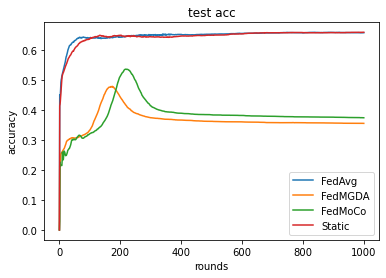

In [13]:
plt.title(f'test acc')
plt.plot(rounds, favg['rs_test_acc'], label='FedAvg')
plt.plot(rounds, fmgda['rs_test_acc'], label='FedMGDA')
plt.plot(rounds, fmoco['rs_test_acc'], label='FedMoCo')
plt.plot(rounds, fstatic['rs_test_acc'], label='Static')
plt.xlabel('rounds')
plt.ylabel('accuracy')
plt.legend()
plt.show()

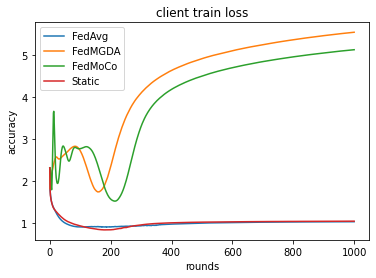

In [14]:
plt.title(f'client train loss')
plt.plot(rounds, favg['rs_train_loss'], label='FedAvg')
plt.plot(rounds, fmgda['rs_train_loss'], label='FedMGDA')
plt.plot(rounds, fmoco['rs_train_loss'], label='FedMoCo')
plt.plot(rounds, fstatic['rs_train_loss'], label='Static')
plt.xlabel('rounds')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [15]:
client1 = 0
client2 = 5

In [16]:
avgloss = np.array(favg['rs_local_train_losses']).T
mgdaloss = np.array(fmgda['rs_local_train_losses']).T
mocoloss = np.array(fmoco['rs_local_train_losses']).T
staticloss = np.array(fstatic['rs_local_train_losses']).T

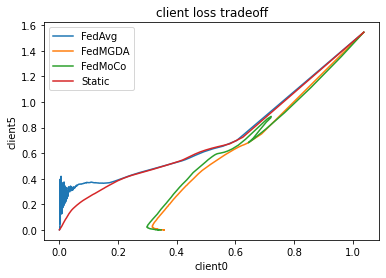

In [18]:
plt.title(f'client loss tradeoff')
plt.plot(avgloss[client1],avgloss[client2], label='FedAvg')
plt.plot(mgdaloss[client1],mgdaloss[client2], label='FedMGDA')
plt.plot(mocoloss[client1],mocoloss[client2], label='FedMoCo')
plt.plot(staticloss[client1],staticloss[client2], label='Static')
plt.xlabel(f'client{client1}')
plt.ylabel(f'client{client2}')
#plt.xlim(0.0, 0.1)
#plt.ylim(0.0, 0.1)
plt.legend()
plt.show()

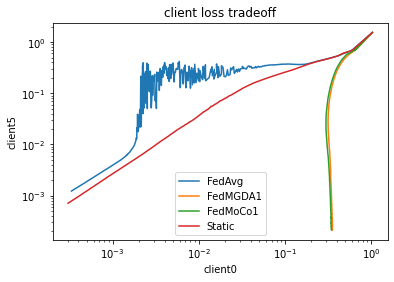

In [19]:
plt.title(f'client loss tradeoff')
plt.plot(avgloss[client1],avgloss[client2], label='FedAvg')
plt.plot(mgdaloss[client1],mgdaloss[client2], label='FedMGDA1')
plt.plot(mocoloss[client1],mocoloss[client2], label='FedMoCo1')
plt.plot(staticloss[client1],staticloss[client2], label='Static')
plt.xlabel(f'client{client1}')
plt.ylabel(f'client{client2}')
plt.yscale('log', base=10)
plt.xscale('log', base=10)
#plt.xlim(0.0, 0.1)
#plt.ylim(0.0, 0.1)
plt.legend()
plt.show()